In [1]:
# Figure 1 - Interactive Plot of Core Shell Model
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Function to plot the cross-section of the spherical core-shell model
def plot_core_shell(core_radius, shell_thickness):
    # Calculate the outer radius
    outer_radius = core_radius + shell_thickness
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Create the core (calyx)
    core_circle = plt.Circle((0, 0), core_radius, color='blue', alpha=0.5, label='Calyx')
    
    # Create the shell (resin)
    shell_circle = plt.Circle((0, 0), outer_radius, color='red', alpha=0.3, label='Resin')
    
    # Add the circles to the plot
    ax.add_artist(shell_circle)
    ax.add_artist(core_circle)
    
    # Set the aspect of the plot to be equal
    ax.set_aspect('equal')
    
    # Set limits and labels
    ax.set_xlim(-outer_radius * 1.1, outer_radius * 1.1)
    ax.set_ylim(-outer_radius * 1.1, outer_radius * 1.1)
    ax.set_xlabel('Microns')
    ax.set_ylabel('Microns')
    ax.set_title('Spherical Core-Shell Model')
    
    # Add legend
    ax.legend()
    
    # Calculate volumes
    core_volume = (4/3) * np.pi * (core_radius ** 3)
    total_volume = (4/3) * np.pi * (outer_radius ** 3)
    shell_volume = total_volume - core_volume
    shell_volume_percent = (shell_volume / total_volume) * 100
    
    # Display the volumes and percentages
    textstr = '\n'.join((
        f'Core (Calyx) Radius: {core_radius:.1f} microns',
        f'Shell (Resin) Thickness: {shell_thickness:.1f} microns',
        f'Shell Volume Percent: {shell_volume_percent:.2f}%'
    ))
    
    # Place text box
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=props)
    
    plt.show()

# Create interactive sliders for core radius and shell thickness
core_radius_slider = FloatSlider(min=500, max=5000, step=50, value=2500, description='Core Radius (microns)')
shell_thickness_slider = FloatSlider(min=50, max=750, step=10, value=500, description='Shell Thickness (microns)')

# Use interact to make the plot interactive
interact(plot_core_shell, core_radius=core_radius_slider, shell_thickness=shell_thickness_slider)


interactive(children=(FloatSlider(value=2500.0, description='Core Radius (microns)', max=5000.0, min=500.0, st…

<function __main__.plot_core_shell(core_radius, shell_thickness)>

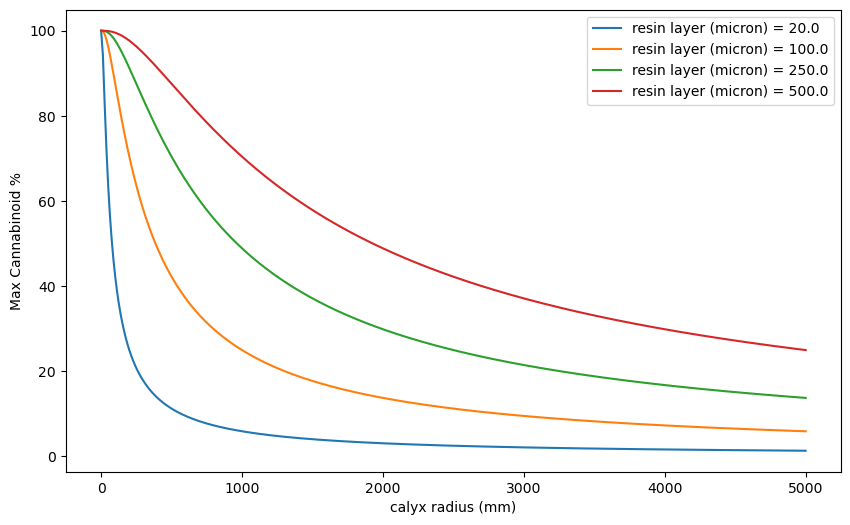

In [17]:
#Figure 2 - line plots of volume fractions

import numpy as np
import matplotlib.pyplot as plt

# Define parameters
rho_t = 1
rho_c = 1
delta_v_values = [0]  # Example specific values for delta_v
x2_values = [.02, 0.1, .25, .5]
# Define the range for y2
y2 = np.linspace(0, 5, 400)

# Create plots for each combination of delta_v and x2
for delta_v in delta_v_values:
    plt.figure(figsize=(10, 6))
    for x2 in x2_values:
        Z2 = 100 * (rho_t / rho_c) * ((y2 + delta_v + x2)**3 - (y2 + delta_v)**3) / (x2 + y2)**3
        plt.plot(1000*y2, Z2, label=f'resin layer (micron) = {1000*x2}')
    
    plt.title(f'')
    plt.xlabel('calyx radius (mm)')
    plt.ylabel('Max Cannabinoid %')
    plt.legend()
    plt.show()


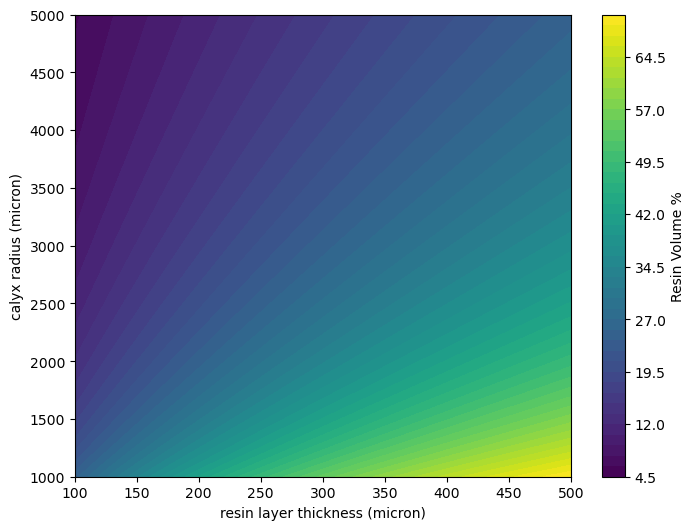

In [20]:
# Figure 3 - Contour plot of volume fractions

import numpy as np
import matplotlib.pyplot as plt

#x = trichome head 
rho_t = 1
rho_c = 1
delta_v = 0

#trichome head diameter range
x2 = np.linspace(0.10, 0.500, 400)

#calyx radius range
y2 = np.linspace(1, 5, 400)
X2, Y2 = np.meshgrid(x2, y2)
Z2 = 100 * (rho_t / rho_c) * ( (Y2 + delta_v + X2)**3 - (Y2 + delta_v)**3) / (Y2+X2)**3


plt.figure(figsize=(8, 6))
contour2 = plt.contourf(1000*X2, 1000*Y2, Z2, cmap='viridis', levels=50)
plt.colorbar(contour2, label='Resin Volume %')
plt.title('')
plt.xlabel('resin layer thickness (micron)')
plt.ylabel('calyx radius (micron)')
plt.show()
